In [52]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import SGDRegressor

In [23]:
x = 2 * np.random.rand(100, 1)
y = 4 + 3 * x + np.random.randn(100, 1)

<function matplotlib.pyplot.show(*args, **kw)>

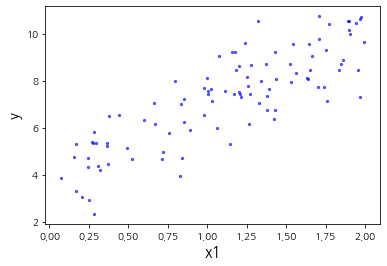

In [24]:
plt.scatter(x, y, s=5, c='b', alpha=0.6)
plt.xlabel('x1', fontsize=15)
plt.ylabel('y', fontsize=15)
plt.show

In [25]:
# numpy. c_ : 슬라이스 오브젝트를 두 번째 축을 따라 연결하도록 변환합니다.
# 에제
# >>> np.c_[np.array([[1,2,3]]), 0, 0, np.array([[4,5,6]])]
# array([[1, 2, 3, 0, 0, 4, 5, 6]])
x_b = np.c_[np.ones((100, 1)), x]

In [30]:
# (n, 1) 크기의 행렬
print(x[:2])
print(np.ones((100, 1))[:2])

[[1.89838552]
 [0.52091961]]
[[1.]
 [1.]]


In [31]:
# (n, 2) 크기의 행렬
print(x_b[:2])

[[1.         1.89838552]
 [1.         0.52091961]]


In [33]:
# inv() : 역행렬 계산
theta_best = np.linalg.inv(x_b.T.dot(x_b)).dot(x_b.T).dot(y)

In [34]:
theta_best

array([[3.9048282 ],
       [3.00996482]])

In [35]:
x_new = np.array([[0], [2]])
x_new_b = np.c_[np.ones((2, 1)), x_new]
y_pred = x_new_b.dot(theta_best)
y_pred

array([[3.9048282 ],
       [9.92475784]])

<function matplotlib.pyplot.show(*args, **kw)>

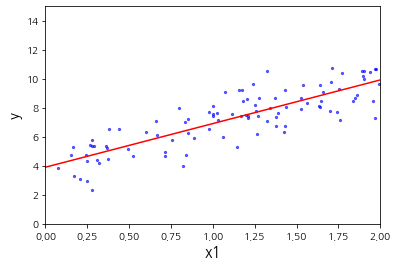

In [37]:
plt.plot(x_new, y_pred, 'r-')
plt.axis([0, 2, 0, 15])
plt.scatter(x, y, s=5, c='b', alpha=0.6)
plt.xlabel('x1', fontsize=15)
plt.ylabel('y', fontsize=15)
plt.show

In [39]:
# sklearn의 linearregression 모델을 이용한 회귀분석
lr = LinearRegression()
lr.fit(x, y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [40]:
lr.intercept_, lr.coef_

(array([3.9048282]), array([[3.00996482]]))

In [42]:
# 위에서 직접 행렬로 계산한 식과 같은 것을 확인할 수 있다.
lr.predict(x_new)

array([[3.9048282 ],
       [9.92475784]])

In [44]:
# theta_best_svd : 하이퍼파라미터 (weight, bias)
# residuals : 잔차
# rank : 차수
# s : ??
theta_best_svd, residuals, rank, s = np.linalg.lstsq(x_b, y, rcond=1e-6)

In [48]:
# 배치경사하강법을 이용한 하이퍼파라미터 구하기 (learning_rate = eta)
eta = 0.1
n_iterations = 1000
m = 100

theta = np.random.randn(2, 1)

for iteration in range(n_iterations):
    gradients = 2/m * x_b.T.dot(x_b.dot(theta)-y)
    theta = theta -eta * gradients

In [49]:
theta

array([[3.9048282 ],
       [3.00996482]])

In [50]:
# 확률적 경사 하강법
n_epochs = 50
t0, t1 = 5, 50

def learning_schedule(t):
    return t0 / (t + t1)

theta = np.random.randn(2, 1)

for epoch in range(n_epochs):
    for i in range(m):
        random_index = np.random.randint(m)
        xi = x_b[random_index:random_index+1]
        yi = y[random_index:random_index+1]
        gradients = 2*xi.T.dot(xi.dot(theta)-yi)
        eta = learning_schedule(epoch * m + i)
        theta = theta - eta * gradients

In [51]:
theta

array([[3.88621743],
       [3.02141959]])

In [53]:
sgd_reg = SGDRegressor(max_iter=1000, tol=1e-3, penalty=None, eta0=0.1)
sgd_reg.fit(x, y.ravel())

SGDRegressor(alpha=0.0001, average=False, early_stopping=False, epsilon=0.1,
             eta0=0.1, fit_intercept=True, l1_ratio=0.15,
             learning_rate='invscaling', loss='squared_loss', max_iter=1000,
             n_iter_no_change=5, penalty=None, power_t=0.25, random_state=None,
             shuffle=True, tol=0.001, validation_fraction=0.1, verbose=0,
             warm_start=False)

In [54]:
sgd_reg.intercept_, sgd_reg.coef_

(array([3.7780251]), array([2.92919374]))